Exercice 3:  
Les arbres de décision peuvent aussi être utilisés pour des problèmes de regression. Dans cet 
exercice, nous allons étudier la base de données winequality-red. Il s’agit de prédire la 
qualité d’un vin en fonction de différentes caractéristiques chimiques. La dernière colonne 
correspond à la qualité du vin, représentée par une note entière. 
Proposez un modèle et analysez le.

In [1]:
# Imports
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
# Chargement des données
wine = pandas.read_csv('winequality-red.csv', delimiter=',')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [15]:
# Séparation des colonnes en Apprentissage/Test
X = wine[wine.columns[:-1]].copy()
Y = wine["quality"].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.7, test_size=0.3, random_state=0)

# Vérification des distributions
print(Y.value_counts(normalize=True))

#vérification des distributions en apprentissage
print(Y_train.value_counts(normalize=True))

#vérification des distributions en test
print(Y_test.value_counts(normalize=True))

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64
5    0.422699
6    0.387846
7    0.137623
4    0.033959
8    0.011618
3    0.006256
Name: quality, dtype: float64
5    0.433333
6    0.425000
7    0.093750
4    0.031250
8    0.010417
3    0.006250
Name: quality, dtype: float64


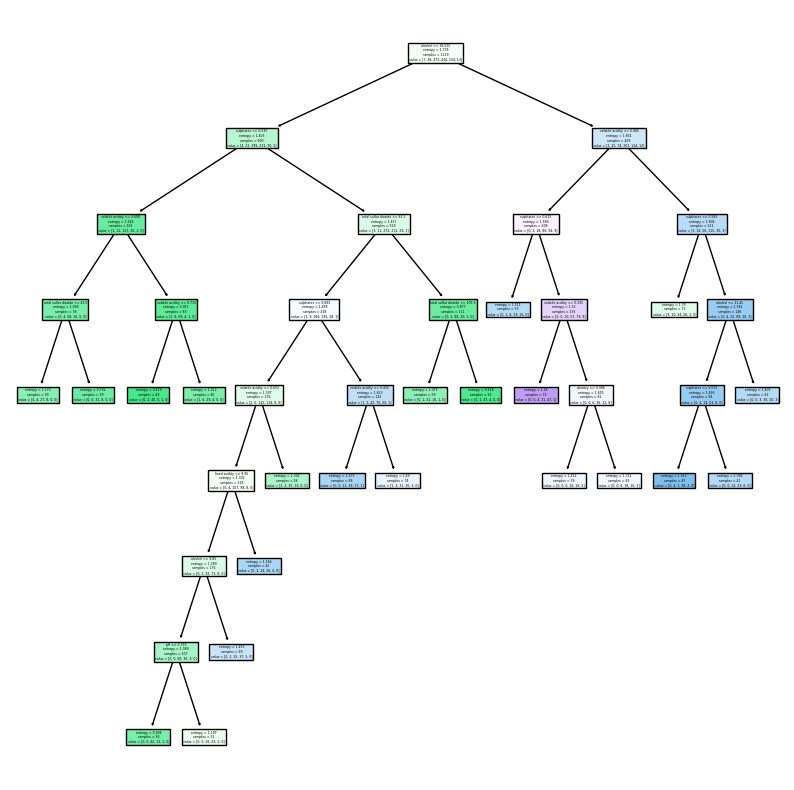

In [8]:
# Création de l'arbre
tree_para = {'criterion':['gini','entropy'],'max_depth':range(1,10),'min_samples_leaf':range(1,50)}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train, Y_train)

# Visualisation de l'arbre
plt.figure(figsize=(10,10))
plot_tree(clf.best_estimator_,feature_names = X.columns,filled=True)
plt.show()

0.6020833333333333


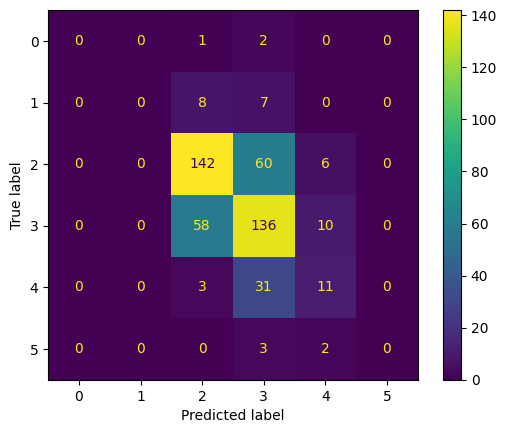

In [17]:
# Prediction avec l'arbre
Y_pred = clf.predict(X=X_test)
print(clf.score(X_test, Y_test))
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(Y_test,Y_pred)).plot()

On constate que sur les valeurs extrêmes de qualités, l'arbre ne fonctionne pas correctement. Cela est peut-être dû au manque de repésentation de ces notes dans les données.